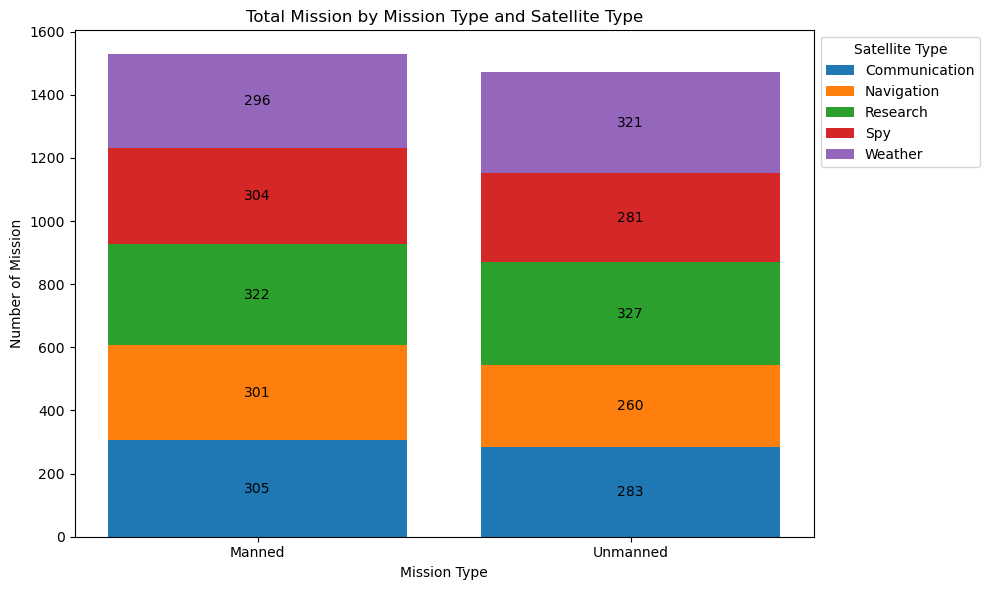

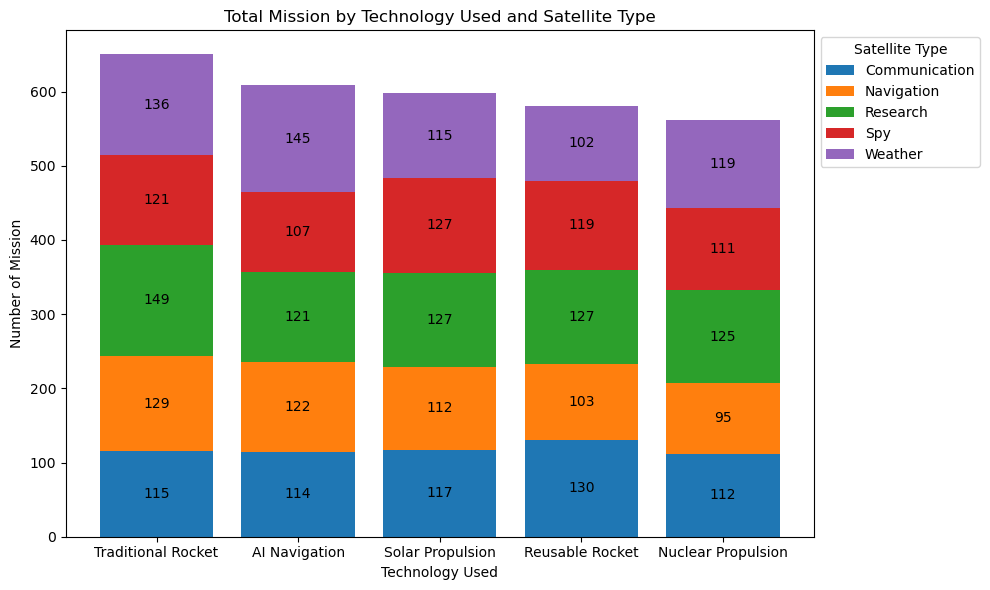

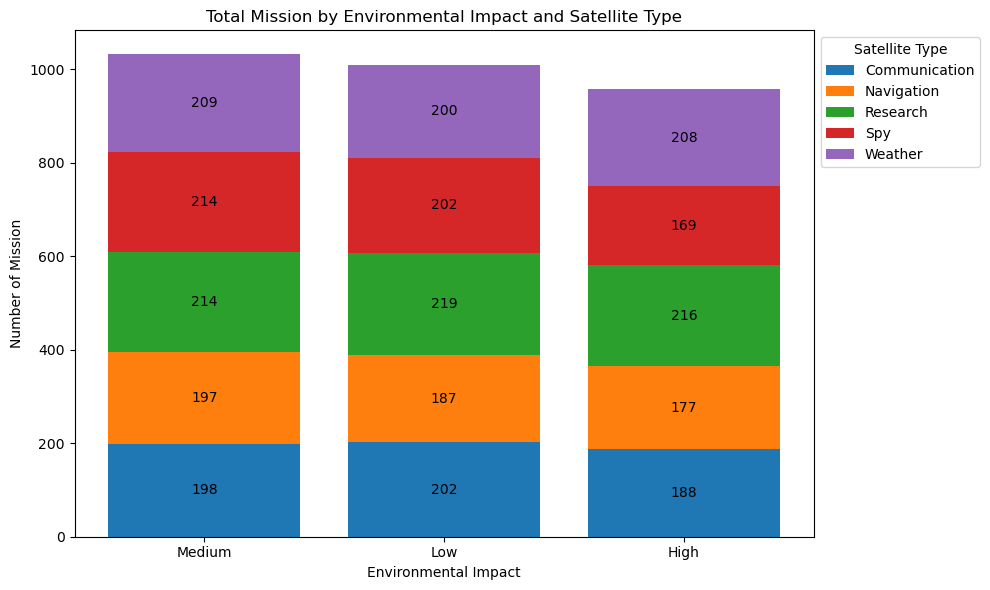

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Global_Space_Exploration_Dataset.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'Mission Type', 'group_col' : 'Satellite Type' },
    { 'count_col' : 'Technology Used', 'group_col' : 'Satellite Type' },
    { 'count_col' : 'Environmental Impact', 'group_col' : 'Satellite Type' }
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Mission by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Mission')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("\n")

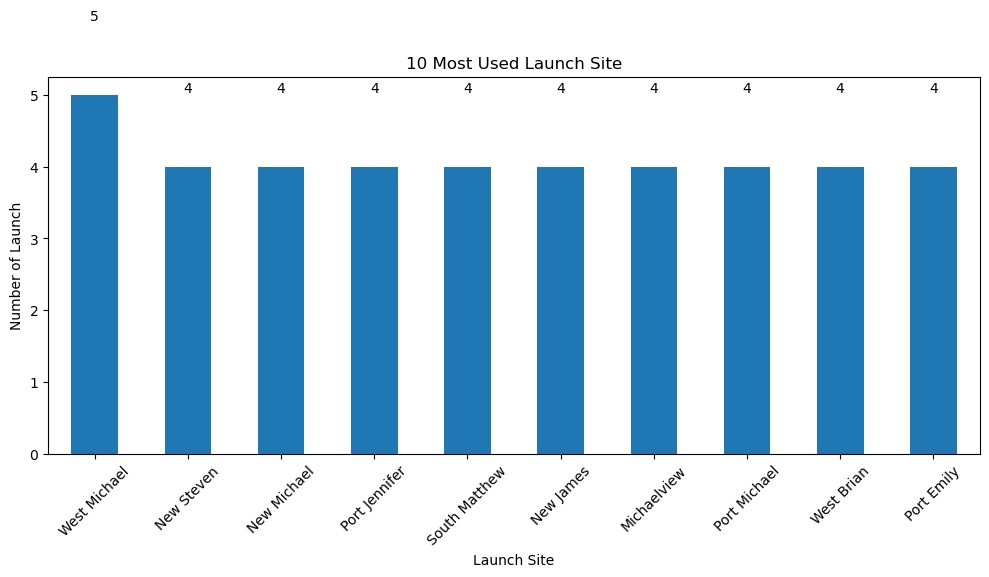

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Bar Chart 10 Most Used Launch Site
df = pd.read_csv("Global_Space_Exploration_Dataset.csv")

# Dataset
top_context = df["Launch Site"].value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("10 Most Used Launch Site")
plt.xlabel("Launch Site")
plt.ylabel("Number of Launch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

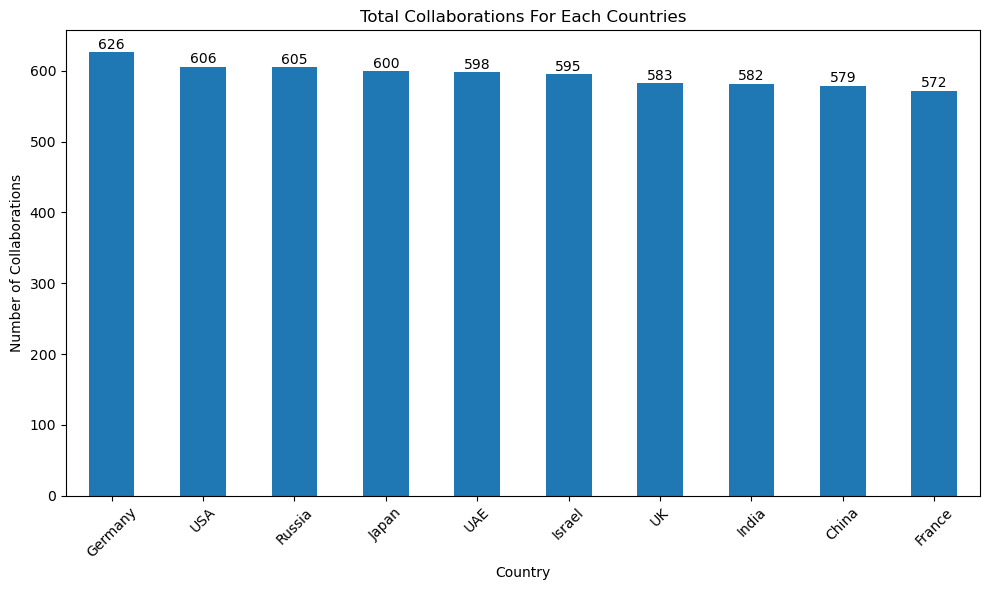

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Bar Chart Total Collaborations For Each Countries
df = pd.read_csv("Global_Space_Exploration_Dataset.csv")

# Calculate collaboration counts: how many times each country appears in Collaborating Countries column
collab_counts = {}
countries = df['Country'].unique()
for country in countries:
    collab_counts[country] = df['Collaborating Countries'].dropna().apply(lambda x: country in x).sum()

# Convert to Series
top_collab = pd.Series(collab_counts).sort_values(ascending=False)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_collab.plot(kind='bar')
# Add labels
for i, value in enumerate(top_collab):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.title("Total Collaborations For Each Countries")
plt.xlabel("Country")
plt.ylabel("Number of Collaborations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

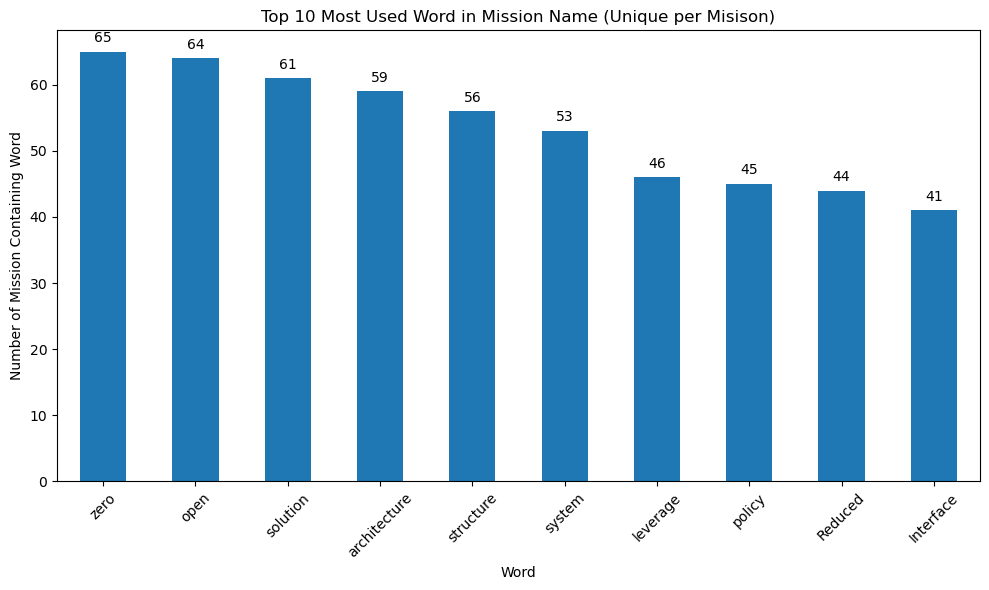

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Most Used Word in Mission Name (Unique per Misison)
df = pd.read_csv("Global_Space_Exploration_Dataset.csv")

# Dataset
# Extract unique words from mission name column and clean
df['words'] = df['Mission Name'].apply(
    lambda x: list({w for w in str(x).split(" ") if w.isalpha() and w.lower() != "(feat."})
)

# Split into rows
words_series = df['words'].explode()

# Count in how many missions each word appears
top_words = words_series.value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_words.plot(kind='bar')
# Add label
for i, value in enumerate(top_words):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Top 10 Most Used Word in Mission Name (Unique per Misison)")
plt.xlabel("Word")
plt.ylabel("Number of Mission Containing Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()